In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

In [34]:
raw_path = "events_data.csv"
clean_path = "cleaned_advanced_events.csv"

df_raw = pd.read_csv(raw_path, low_memory=False)
df_clean = pd.read_csv(clean_path, low_memory=False)

print(f"Raw: {len(df_raw):,} rows × {df_raw.shape[1]} columns")
print(f"Cleaned: {len(df_clean):,} rows × {df_clean.shape[1]} columns")

Raw: 134,911 rows × 27 columns
Cleaned: 109,566 rows × 50 columns


In [35]:
# optional for take samples
# df_raw = df_raw.sample(20000, random_state=42)
# df_clean = df_clean.sample(20000, random_state=42)

<Figure size 1000x600 with 0 Axes>

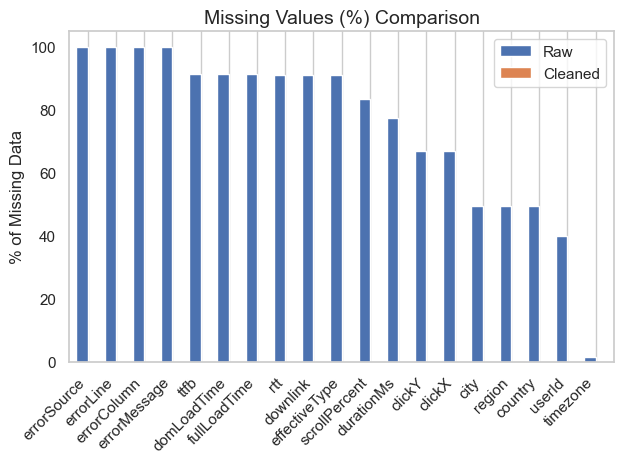

In [36]:
# Helper function for missing value visualization
def plot_missing_comparison(df1, df2, labels=("Raw", "Cleaned")):
    missing1 = df1.isna().mean() * 100
    missing2 = df2.isna().mean() * 100
    missing_df = pd.DataFrame({labels[0]: missing1, labels[1]: missing2})
    missing_df = missing_df[(missing_df > 0).any(axis=1)].sort_values(by=labels[0], ascending=False)

    plt.figure(figsize=(10, 6))
    missing_df.plot(kind="bar", width=0.8)
    plt.title("Missing Values (%) Comparison", fontsize=14)
    plt.ylabel("% of Missing Data")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

plot_missing_comparison(df_raw, df_clean)

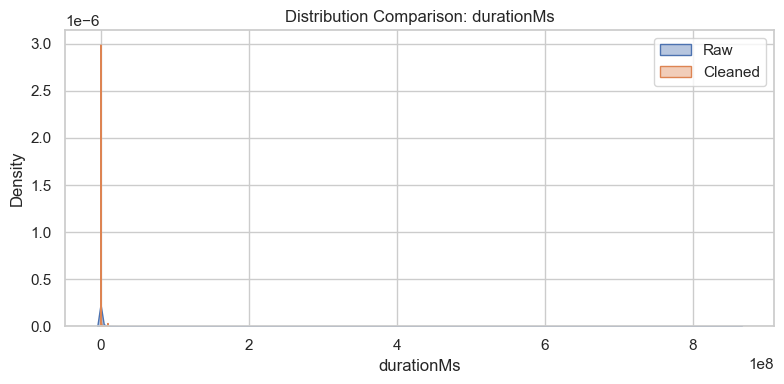

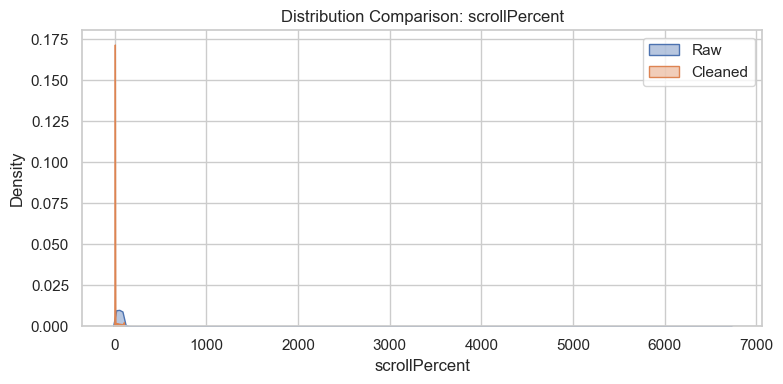

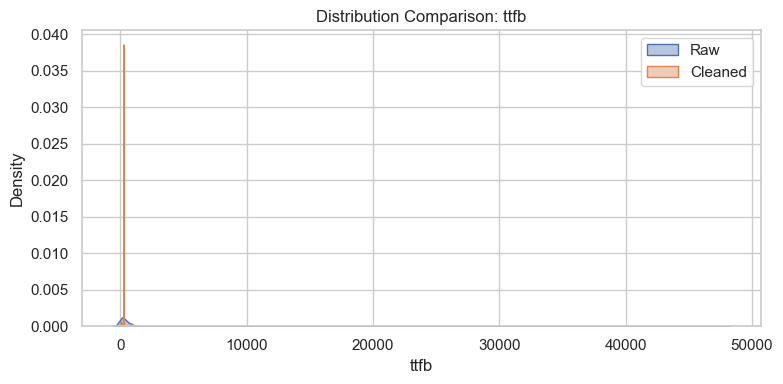

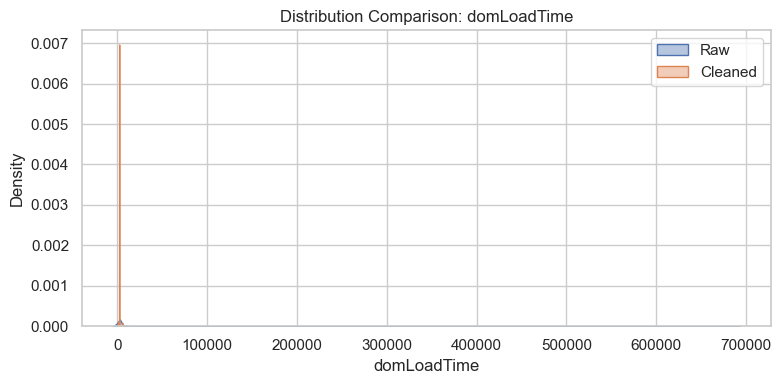

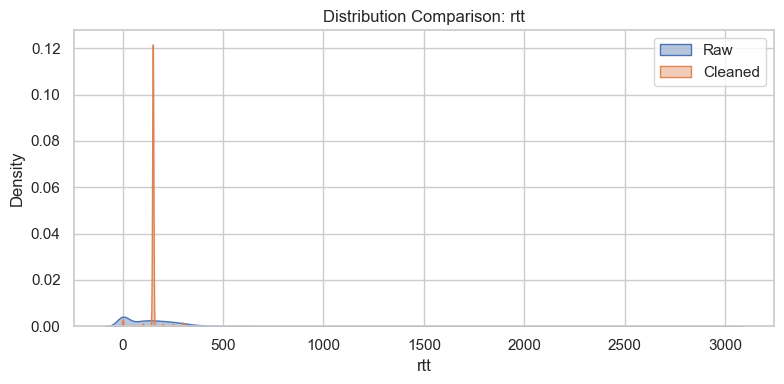

In [37]:
# Numeric distribution comparison
def plot_numeric_distribution(col):
    if col not in df_raw.columns or col not in df_clean.columns:
        return
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_raw[col].dropna(), label="Raw", fill=True, alpha=0.4)
    sns.kdeplot(df_clean[col].dropna(), label="Cleaned", fill=True, alpha=0.4)
    plt.title(f"Distribution Comparison: {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

numeric_candidates = ["durationMs", "scrollPercent", "ttfb", "domLoadTime", "rtt"]
for col in numeric_candidates:
    if col in df_raw.columns:
        plot_numeric_distribution(col)

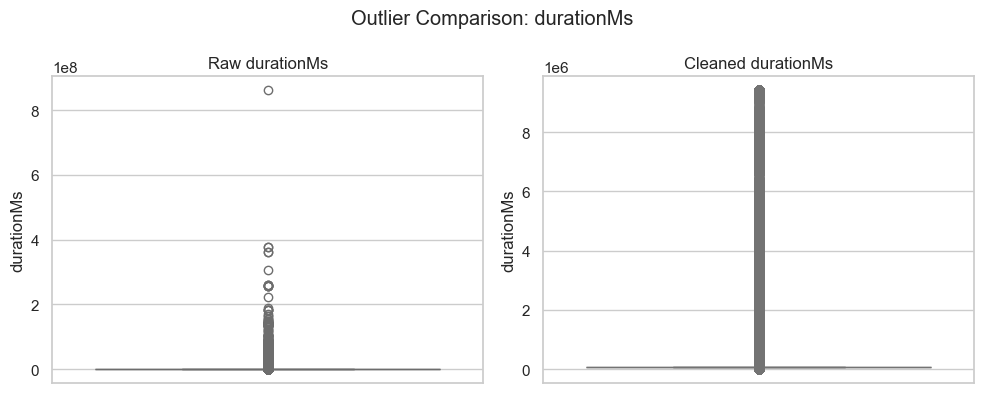

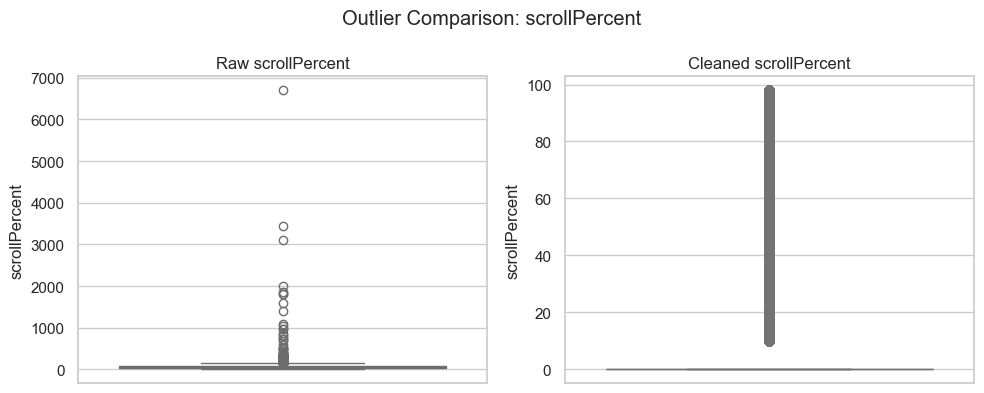

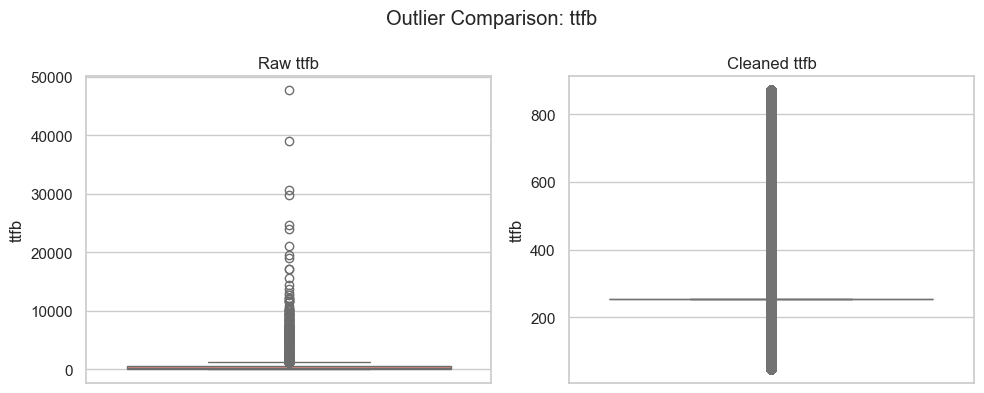

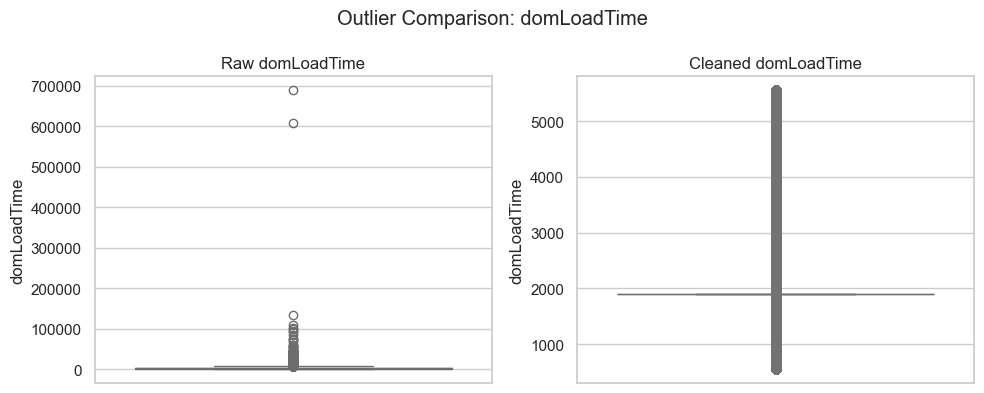

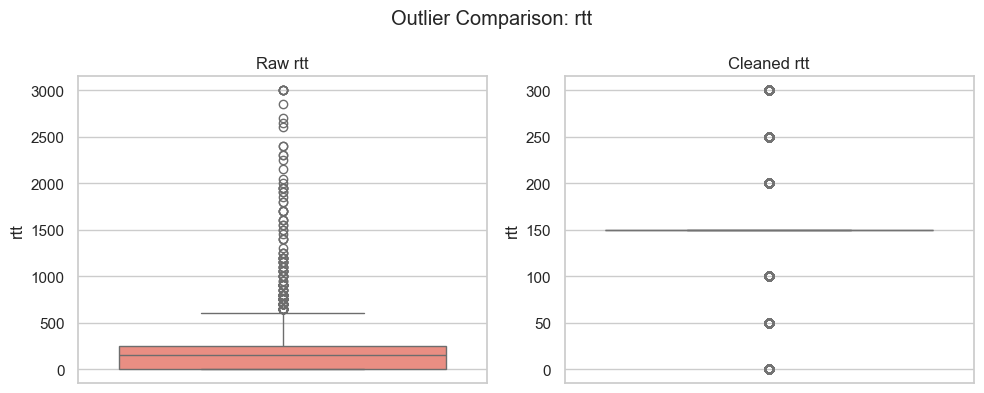

In [38]:
# Outlier comparison (boxplots)
def plot_box_comparison(col):
    if col not in df_raw.columns or col not in df_clean.columns:
        return
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.boxplot(y=df_raw[col], ax=ax[0], color="salmon")
    ax[0].set_title(f"Raw {col}")
    sns.boxplot(y=df_clean[col], ax=ax[1], color="lightgreen")
    ax[1].set_title(f"Cleaned {col}")
    plt.suptitle(f"Outlier Comparison: {col}")
    plt.tight_layout()
    plt.show()

for col in numeric_candidates:
    if col in df_raw.columns:
        plot_box_comparison(col)

<Figure size 1000x600 with 0 Axes>

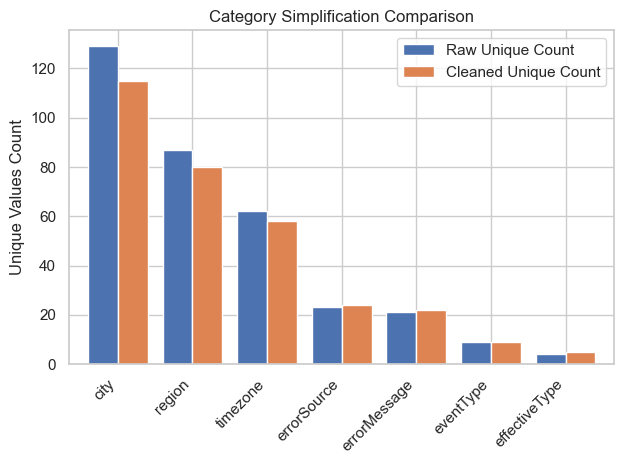

In [39]:
# Categorical simplification effect
def compare_unique_counts():
    raw_uniques = df_raw.select_dtypes("object").nunique()
    clean_uniques = df_clean.select_dtypes("number").nunique()
    common_cols = [c for c in raw_uniques.index if c in clean_uniques.index]

    comparison = pd.DataFrame({
        "Raw Unique Count": raw_uniques[common_cols],
        "Cleaned Unique Count": clean_uniques[common_cols]
    }).sort_values(by="Raw Unique Count", ascending=False).head(20)

    plt.figure(figsize=(10, 6))
    comparison.plot(kind="bar", width=0.8)
    plt.title("Category Simplification Comparison")
    plt.ylabel("Unique Values Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

compare_unique_counts()

C:\Users\KAVI\AppData\Local\Temp\ipykernel_4848\574921038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Raw", "Cleaned"], y=[raw_mem, clean_mem], palette=["salmon", "lightgreen"])


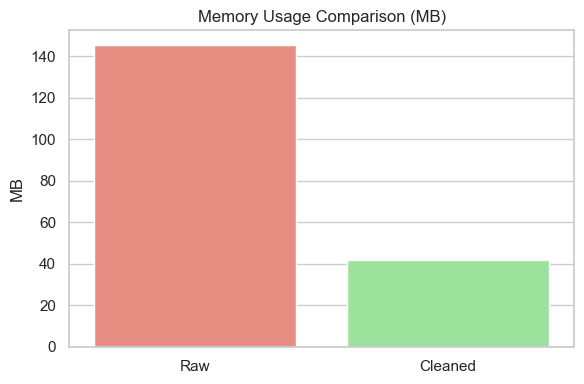

Raw memory: 145.28 MB → Cleaned memory: 41.80 MB
Compression ratio: 3.5× smaller after cleaning ✅


In [40]:
# Memory usage before vs after
def memory_usage_mb(df):
    return df.memory_usage(deep=True).sum() / 1024**2

raw_mem = memory_usage_mb(df_raw)
clean_mem = memory_usage_mb(df_clean)

plt.figure(figsize=(6, 4))
sns.barplot(x=["Raw", "Cleaned"], y=[raw_mem, clean_mem], palette=["salmon", "lightgreen"])
plt.title("Memory Usage Comparison (MB)")
plt.ylabel("MB")
plt.tight_layout()
plt.show()

print(f"Raw memory: {raw_mem:.2f} MB → Cleaned memory: {clean_mem:.2f} MB")
print(f"Compression ratio: {raw_mem / clean_mem:.1f}× smaller after cleaning ✅")